In [29]:
# Copyright 2020 Google LLC.                                                                                                                                   
#                                                                                                                                                              
# Licensed under the Apache License, Version 2.0 (the "License");                                                                                              
# you may not use this file except in compliance with the License.                                                                                             
# You may obtain a copy of the License at                                                                                                                      
#                                                                                                                                                              
#     http://www.apache.org/licenses/LICENSE-2.0                                                                                                               
#                                                                                                                                                              
# Unless required by applicable law or agreed to in writing, software                                                                                          
# distributed under the License is distributed on an "AS IS" BASIS,                                                                                            
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.                                                                                     
# See the License for the specific language governing permissions and                                                                                          
# limitations under the License. 

(256, 256, (256,))

In [ ]:
import numpy as np
import time
import os

data_dir = "outputs/debug/random/convai2/opedata/baseline_model/"
plot_dir = "outputs/plotdir/embedding/random_convai2_"
embed_ref = np.load(data_dir+'embeddings_ref.npy',allow_pickle=True)
embed_gen = np.load(data_dir+'embeddings_gen.npy',allow_pickle=True)
reward = np.load(data_dir+'/reward.npy')
len(embed_ref),len(embed_gen),reward.shape

# Viusalization

In [30]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
font = {'family' : 'normal',
        'size'   : 15}

matplotlib.rc('font', **font)

#sns.set_context("paper", rc={"font_scale":2}) 
#sns.set_context("paper", rc={"font.size":20,"axes.titlesize":20,"axes.labelsize":20}) 

embed_ref=np.concatenate(embed_ref,axis=0)
embed_gen=np.concatenate(embed_gen,axis=0)
l = embed_ref.shape[0]
X=np.concatenate((embed_ref,embed_gen),axis=0)
y=np.array([0]*l+[1]*l)

In [31]:
import pandas as pd
df = pd.DataFrame(X)
df['y'] = y
df["Agent"] = df['y'].apply(lambda i: ['Behavior','Target'][i])
df

,0,1,2,3,4,5,6,7,8,9,...,760,761,762,763,764,765,766,767,y,Agent
0,1.883778,0.538320,-1.167731,2.894938,-0.054908,-2.187157,0.751338,-0.725729,-1.529391,1.166835,...,-0.621013,1.096886,0.607603,0.051692,2.810330,-0.435444,-0.155985,1.010877,0,Behavior
1,1.872322,0.539849,-3.208292,1.984586,1.501715,-2.014939,0.950541,-0.732295,-1.683848,1.154918,...,-0.537594,1.076176,1.405000,0.063943,2.634981,-0.425572,0.010209,1.121182,0,Behavior
2,1.890015,0.535792,-1.036724,2.626003,1.599942,-2.103924,1.337414,-0.736067,-1.552621,1.141536,...,-0.568032,1.130539,0.562679,0.075691,2.321017,-0.418698,-0.171903,1.040041,0,Behavior
3,1.877613,0.565929,-0.894762,0.572764,1.441638,-2.093593,1.343819,-0.722941,-0.604864,1.152537,...,-0.579249,1.085663,0.660285,0.063932,2.552938,-0.463983,0.042014,1.016363,0,Behavior
4,1.895640,0.541960,-2.795610,2.605966,1.568427,-2.136500,1.319429,-0.711666,-1.450149,1.176752,...,-0.541232,0.955528,0.487831,0.066226,2.834378,-0.406671,0.036005,1.031285,0,Behavior
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3067,1.861503,0.541551,-3.183292,2.318283,1.545479,-2.073243,0.889474,-0.717358,-1.534928,1.136797,...,-0.264919,1.053840,0.639985,0.085770,2.685909,-0.423553,0.027354,1.091262,1,Target
3068,1.877661,0.542471,-1.444153,2.430015,1.432010,-2.051084,0.833757,-0.715363,-1.543527,1.144901,...,-0.626820,1.132070,0.743103,0.060032,2.485173,-0.374810,0.040990,1.003838,1,Target
3069,1.868559,0.549775,-1.152043,2.374005,1.452931,-2.009302,0.756188,-0.737504,-1.410613,1.140089,...,-0.624922,1.078910,0.548488,0.050140,0.102179,-0.508362,0.029220,1.457506,1,Target
3070,1.874185,0.524779,-1.289289,0.565761,-0.059446,-2.169937,0.839488,-0.578298,-1.559170,1.103122,...,-0.546727,1.093099,0.542740,0.056311,2.648402,-0.485794,0.025195,0.999074,1,Target


In [32]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X)
df['pca-one'] = pca_result[:,0]
df['pca-two'] = pca_result[:,1] 
print(pca_result.shape)
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

(3072, 2)
Explained variation per principal component: [0.02264022 0.02210651]


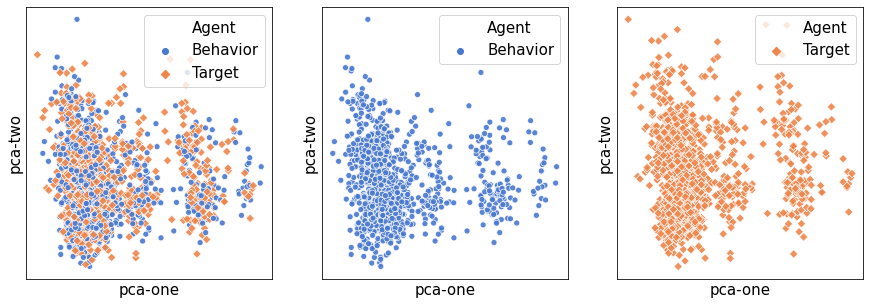

In [33]:
plt.figure(figsize=(15,5))
plt.subplot(131)
ax = sns.scatterplot(
    x="pca-one", y="pca-two",
    hue="Agent",
    palette=sns.color_palette("muted", 2),
    style="Agent",
    markers=["o","D"],
    data=df.sample(frac=1),
    legend="full",
    alpha=0.9
)
ax.tick_params(
    axis='both',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    left=False,         # ticks along the left edge are off
    labelleft=False,
    labelbottom=False) # labels along the bottom edge are off
plt.subplot(132)
ax = sns.scatterplot(
    x="pca-one", y="pca-two",
    hue="Agent",
    palette=[sns.color_palette("muted")[0]],
    style="Agent",
    markers=["o"],
    data=df[:l],
    legend="full",
    alpha=0.9
)
ax.tick_params(
    axis='both',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    left=False,         # ticks along the left edge are off
    labelleft=False,
    labelbottom=False) # labels along the bottom edge are off
plt.subplot(133)
ax = sns.scatterplot(
    x="pca-one", y="pca-two",
    hue="Agent",
    palette=[sns.color_palette("muted")[1]],
    style="Agent",
    markers=["D"],
    data=df[l:],
    legend="full",
    alpha=0.9
)
ax.tick_params(
    axis='both',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    left=False,         # ticks along the left edge are off
    labelleft=False,
    labelbottom=False) # labels along the bottom edge are off
plt.savefig(plot_dir+"plot_pca.pdf",dpi=60)

In [34]:
time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=1000)
tsne_results = tsne.fit_transform(X)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 3072 samples in 0.215s...
[t-SNE] Computed neighbors for 3072 samples in 13.805s...
[t-SNE] Computed conditional probabilities for sample 1000 / 3072
[t-SNE] Computed conditional probabilities for sample 2000 / 3072
[t-SNE] Computed conditional probabilities for sample 3000 / 3072
[t-SNE] Computed conditional probabilities for sample 3072 / 3072
[t-SNE] Mean sigma: 1.914733
[t-SNE] KL divergence after 250 iterations with early exaggeration: 94.451805
[t-SNE] KL divergence after 1000 iterations: 2.976621
t-SNE done! Time elapsed: 23.92051863670349 seconds


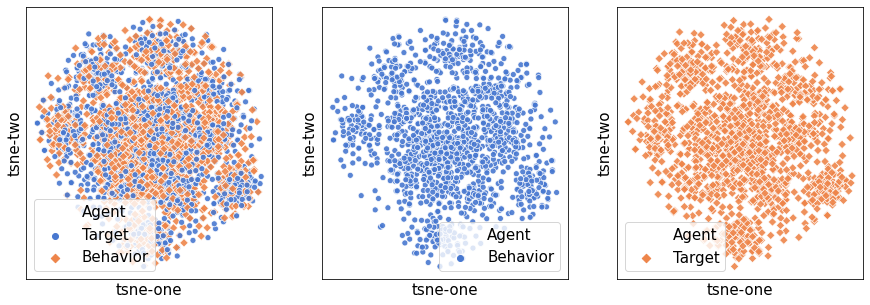

In [35]:
df['tsne-one'] = tsne_results[:,0]
df['tsne-two'] = tsne_results[:,1]
plt.figure(figsize=(15,5))
plt.subplot(131)
ax = sns.scatterplot(
    x="tsne-one", y="tsne-two",
    hue="Agent",
    palette=sns.color_palette("muted", 2),
    style="Agent",
    markers=["o","D"],
    data=df.sample(frac=1),
    legend="full",
    alpha=0.9
)
ax.tick_params(
    axis='both',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    left=False,         # ticks along the left edge are off
    labelleft=False,
    labelbottom=False) # labels along the bottom edge are off
plt.subplot(132)
ax = sns.scatterplot(
    x="tsne-one", y="tsne-two",
    hue="Agent",
    palette=[sns.color_palette("muted")[0]],
    style="Agent",
    markers=["o"],
    data=df[:l],
    legend="full",
    alpha=0.9
)
ax.tick_params(
    axis='both',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    left=False,         # ticks along the left edge are off
    labelleft=False,
    labelbottom=False) # labels along the bottom edge are off
plt.subplot(133)
ax = sns.scatterplot(
    x="tsne-one", y="tsne-two",
    hue="Agent",
    palette=[sns.color_palette("muted")[1]],
    style="Agent",
    markers=["D"],
    data=df[l:],
    legend="full",
    alpha=0.9
)
ax.tick_params(
    axis='both',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    left=False,         # ticks along the left edge are off
    labelleft=False,
    labelbottom=False) # labels along the bottom edge are off
plt.savefig(plot_dir+"plot_tsne.pdf",dpi=60)